In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from transformers import AutoTokenizer, DistilBertModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

In [26]:
# create a simple torch model with 1 fully connected layer

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 2)

    def forward(self, x):
        # apply relu on the output of the fully connected layer
        # x = F.relu(self.fc1(x))
        x = self.fc1(x)
        return x

In [27]:
# load api key from secrets.json
import openai
import json

try:
    with open("secrets.json") as f:
        secrets = json.load(f)
    my_api_key = secrets["openai"]
    print("API key loaded.")
    openai.api_key = my_api_key
except FileNotFoundError:
    print("Secrets file not found. YOU NEED THEM TO RUN THIS.")

API key loaded.


In [28]:
timestamp = round(time.time())
print(f"Timestamp: {timestamp}")

Timestamp: 1702158152


## Create dataset

### ✋ Change the classification here ↓

In [29]:
classification = 'animal'

In [30]:
prompt = f"Please generate 300 unique {classification}. The output MUST ONLY be a Python list of strings."
# prompt = f"# prompt = f"Please generate 300 unique {classification} words. Please include the most common and familiar instances. The output MUST ONLY be a Python list of the words."# prompt = f"Please generate 300 unique {classification} words. Please include the most common and familiar instances. The output MUST ONLY be a Python list of the words."
# prompt = f"Please generate 300 unique {classification} words. Please include the most common and familiar instances. The output MUST ONLY be a Python list of the words."

In [31]:
# model_num = "gpt-3.5-turbo-1106"
# model_num = "gpt-4-1106-preview"
model_num = "gpt-4"

completion = openai.ChatCompletion.create(
  model=model_num,
  messages=[
    {"role": "system", "content": "You are an expert category word generator."},
    {"role": "user", "content": prompt},
  ]
)

print(completion.choices[0].message)

# log the stringified output into a txt file by appending it to the end of the file
# with open("output.txt", "a") as f:
#   f.write(str(completion))

{
  "role": "assistant",
  "content": "[\"Lion\", \"Tiger\", \"Elephant\", \"Cheetah\", \"Leopard\", \"Giraffe\", \"Hippopotamus\", \"Rhino\", \"Zebra\", \"Gorilla\", \"Chimpanzee\", \"Koala\", \"Kangaroo\", \"Penguin\", \"Panda\", \"Grizzly\", \"Polar Bear\", \"Otter\", \"Seal\", \"Walrus\", \"Whale\", \"Dolphin\", \"Shark\", \"Octopus\", \"Starfish\", \"Squid\", \"Clam\", \"Lobster\", \"Crab\", \"Shrimp\", \"Jellyfish\", \"Tuna\", \"Salmon\", \"Trout\", \"Catfish\", \"Barracuda\", \"Stingray\", \"Eel\", \"Swordfish\", \"Piranha\", \"Flamingo\", \"Ostrich\", \"Peacock\", \"Swan\", \"Falcon\", \"Eagle\", \"Hawk\", \"Owl\", \"Hummingbird\", \"Parrot\", \"Canary\", \"Duck\", \"Goose\", \"Pigeon\", \"Spoonbill\", \"Puffin\", \"Pelican\", \"Heron\", \"Sparrow\", \"Finch\", \"Kingfisher\", \"Kookaburra\", \"Dove\", \"Cuckoo\", \"Woodpecker\", \"Toucan\", \"Albatross\", \"Seagull\", \"Crow\", \"Raven\", \"Magpie\", \"Jay\", \"Hedgehog\", \"Badger\", \"Beaver\", \"Squirrel\", \"Raccoon\", \"C

In [32]:
words = eval(completion.choices[0].message.content)

# make sure that the output is a list of words
print(words)
print(words[0])

['Lion', 'Tiger', 'Elephant', 'Cheetah', 'Leopard', 'Giraffe', 'Hippopotamus', 'Rhino', 'Zebra', 'Gorilla', 'Chimpanzee', 'Koala', 'Kangaroo', 'Penguin', 'Panda', 'Grizzly', 'Polar Bear', 'Otter', 'Seal', 'Walrus', 'Whale', 'Dolphin', 'Shark', 'Octopus', 'Starfish', 'Squid', 'Clam', 'Lobster', 'Crab', 'Shrimp', 'Jellyfish', 'Tuna', 'Salmon', 'Trout', 'Catfish', 'Barracuda', 'Stingray', 'Eel', 'Swordfish', 'Piranha', 'Flamingo', 'Ostrich', 'Peacock', 'Swan', 'Falcon', 'Eagle', 'Hawk', 'Owl', 'Hummingbird', 'Parrot', 'Canary', 'Duck', 'Goose', 'Pigeon', 'Spoonbill', 'Puffin', 'Pelican', 'Heron', 'Sparrow', 'Finch', 'Kingfisher', 'Kookaburra', 'Dove', 'Cuckoo', 'Woodpecker', 'Toucan', 'Albatross', 'Seagull', 'Crow', 'Raven', 'Magpie', 'Jay', 'Hedgehog', 'Badger', 'Beaver', 'Squirrel', 'Raccoon', 'Chipmunk', 'Rat', 'Mouse', 'Hamster', 'Rabbit', 'Mongoose', 'Meerkat', 'Skunk', 'Weasel', 'Otter', 'Chinchilla', 'Fox', 'Wolf', 'Coyote', 'Hyena', 'Bison', 'Buffalo', 'Yak', 'Moose', 'Elk', 'Rein

In [33]:
# change all strings to lowercase
words = [x.lower() for x in words]

print(words)

['lion', 'tiger', 'elephant', 'cheetah', 'leopard', 'giraffe', 'hippopotamus', 'rhino', 'zebra', 'gorilla', 'chimpanzee', 'koala', 'kangaroo', 'penguin', 'panda', 'grizzly', 'polar bear', 'otter', 'seal', 'walrus', 'whale', 'dolphin', 'shark', 'octopus', 'starfish', 'squid', 'clam', 'lobster', 'crab', 'shrimp', 'jellyfish', 'tuna', 'salmon', 'trout', 'catfish', 'barracuda', 'stingray', 'eel', 'swordfish', 'piranha', 'flamingo', 'ostrich', 'peacock', 'swan', 'falcon', 'eagle', 'hawk', 'owl', 'hummingbird', 'parrot', 'canary', 'duck', 'goose', 'pigeon', 'spoonbill', 'puffin', 'pelican', 'heron', 'sparrow', 'finch', 'kingfisher', 'kookaburra', 'dove', 'cuckoo', 'woodpecker', 'toucan', 'albatross', 'seagull', 'crow', 'raven', 'magpie', 'jay', 'hedgehog', 'badger', 'beaver', 'squirrel', 'raccoon', 'chipmunk', 'rat', 'mouse', 'hamster', 'rabbit', 'mongoose', 'meerkat', 'skunk', 'weasel', 'otter', 'chinchilla', 'fox', 'wolf', 'coyote', 'hyena', 'bison', 'buffalo', 'yak', 'moose', 'elk', 'rein

In [34]:
# remove duplicates
words = list(set(words))

print(len(words))

# assert len(list(set(words))) == len(words)

290


In [35]:
non_words = [
    "run", "jump", "eat", "sleep", "think", "happy", "fast", "slow", "beautiful", "smart",
    "quickly", "easily", "always", "never", "under", "over", "beside", "between", "through", "with",
    "and", "but", "or", "because", "although", "well", "yes", "no", "oh", "wow", "ouch",
    "go", "come", "stop", "start", "win", "lose", "hot", "cold", "loud", "soft",
    "bright", "dark", "high", "low", "near", "far", "big", "small", "old", "new",
    "first", "last", "next", "previous", "good", "bad", "happy", "sad", "rich", "poor",
    "early", "late", "hard", "easy", "simple", "complex", "right", "wrong", "true", "false",
    "up", "down", "in", "out", "on", "off", "up", "down", "here", "there",
    "now", "then", "today", "tomorrow", "yesterday", "soon", "later", "before", "after", "while",
    "once", "twice", "thrice", "nevertheless", "however", "suddenly", "finally", "quickly", "slowly", "nowadays",
    "some", "many", "few", "most", "none", "all", "each", "every", "somebody", "nobody",
    "something", "nothing", "somewhere", "nowhere", "anywhere", "everywhere", "this", "that", "these", "those",
    "which", "what", "who", "whom", "whose", "where", "when", "why", "how", "whether",
    "if", "unless", "because", "since", "although", "though", "while", "before", "after", "when",
    "and", "or", "but", "nor", "for", "so", "yet", "either", "neither", "however"
    "is", "are", "was", "were", "am", "be", "being", "been", "has", "have",
    "had", "do", "does", "did", "doing", "will", "would", "shall", "should", "can",
    "could", "may", "might", "must", "ought", "ain't", "isn't", "aren't", "wasn't", "weren't",
    "hasn't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't",
    "can't", "cannot", "couldn't", "mayn't", "mightn't", "mustn't", "oughtn't", "it's", "that's", "who's",
    "what's", "there's", "here's", "when's", "where's", "why's", "how's", "not", "no", "never",
    "none", "nope", "nothing", "nowhere", "nobody", "notwithstanding", "however", "although", "though", "but",
    "yet", "either", "neither", "nor", "or", "and", "also", "more", "less", "most",
    "least", "very", "too", "so", "such", "just", "only", "quite", "almost", "even",
    "well", "better", "best", "worse", "worst", "moreover", "furthermore", "nevertheless", "nonetheless", "however",
    "therefore", "consequently", "thus", "hence", "since", "because", "although", "though", "if", "unless",
    "until", "while", "when", "where", "after", "before", "because", "since", "if", "unless",
    "until", "while", "when", "where", "after", "before", "if", "unless", "while", "when",
    "where", "after", "before", "though", "although", "because", "since", "while", "when", "where",
    "if", "unless", "until", "though", "although", "because", "since", "so", "that", "if",
    "unless", "until", "while", "when", "where", "after", "before", "if", "unless", "until",
    "while", "when", "where", "after", "before", "but", "and", "or", "as", "if",
    "unless", "until", "while", "when", "where", "after", "before", "but", "and", "or",
    "as", "because", "since", "so", "that", "if", "unless", "until", "though", "although",
    "because", "since", "while", "when", "where", "if", "unless", "until", "though", "although",
    "because", "since", "so", "that", "if", "unless", "until", "though", "although", "because",
    "since", "while", "when", "where", "after", "before", "if", "unless", "until", "though",
    "although", "because", "since", "so", "that", "if", "unless", "until", "while", "when",
    "where", "after", "before", "though", "although", "because", "since", "so", "that", "if",
    "unless", "until", "while", "when", "where", "after", "before", "but", "and", "or",
    "as", "because", "since", "so", "that", "if", "unless", "until", "though", "although",
    "because", "since", "while", "when", "where", "if", "unless", "until", "though", "although",
    "because", "since", "so", "that", "if", "unless", "until", "though", "although", "because"
    ",", "Wa", "--", ";", ":", "...", "-", ".", "?", "!", "'", "#", "``", "`", "$", "US$", "C$", "and", "or",
    "But", "but", "million", "billion", "one", "two", "10", "the", "a", "The", "an", "this", "there", "There",
    "Perestroika", "besuboru", "de", "etc.", "of", "for", "on", "new", "other", "last", "many", "higher", "lower",
    "largest", "least", "latest", "best", "1", "2", "3", "4", "5", "will", "would", "could", "can", "may", "all",
    "such", "half", "Such", "All", "Word", "it", "he", "they", "I", "It", "its", "their", "his", "her", "our",
    "n't", "also", "not", "only", "even", "more", "earlier", "less", "better", "longer", "most", "Most", "up",
    "out", "off", "in", "down", "&", "to", "To", "TO", "OK", "Oh", "no", "watch", "haul", "extinguish", "hold",
    "chill", "eat", "surf", "devour", "drive", "sail", "descend", "glide", "throw", "carry", "dine", "call",
    "soar", "walk", "sip", "rinse", "uncork", "skate", "type", "read", "bake", "poke", "consume", "fly", "fasten",
    "hit", "flush", "peel", "dry", "crave", "ride", "sit", "indulge", "chop", "be", "make", "buy", "take", "said",
    "was", "were", "had", "did", "cooling", "heating", "including", "according", "being", "growing", "trying",
    "been", "expected", "made", "compared", "based", "are", "have", "say", "do", "re", "is", "has", "says", "s",
    "does", "which", "that", "That", "THAT", "who", "what", "What", "whom", "Who", "whose", "when", "where", "how",
    "When", "why",
    "apple", "book", "car", "dog", "cat", "house", "tree", "friend", "time", "money",
    "heart", "sun", "moon", "sky", "water", "fire", "earth", "flower", "city", "music",
    "child", "parent", "school", "job", "love", "smile", "day", "night", "star", "cloud",
    "bird", "fish", "food", "computer", "phone", "internet", "coffee", "tea", "shoes", "hat",
    "dream", "goal", "team", "game", "hope", "fear", "joy", "anger", "peace", "war",
    "friendship", "family", "health", "beauty", "knowledge", "power", "nature", "history", "science",
    "art", "happiness", "sadness", "color", "mind", "body", "soul", "memory", "experience", "idea",
    "faith", "truth", "lie", "problem", "solution", "question", "answer", "light", "darkness", "wind",
    "rain", "snow", "smell", "taste", "touch", "sound", "silence", "joy", "freedom", "future",
    "past", "present", "purpose", "journey", "adventure", "discovery", "challenge", "victory", "defeat"
    "time", "person", "year", "way", "day", "man", "government", "company", "number", "child",
    "part", "place", "case", "group", "problem", "fact", "eye", "friend", "charge", "point",
    "home", "hand", "job", "food", "example", "place", "book", "end", "government", "water",
    "room", "mother", "area", "money", "story", "fact", "month", "lot", "right", "study",
    "face", "word", "business", "question", "school", "reason", "air", "mind", "law", "company",
    "word", "number", "order", "example", "market", "name", "door", "value", "position", "body",
    "problem", "theory", "class", "child", "car", "house", "year", "arm", "lot", "father",
    "word", "team", "result", "school", "name", "line", "place", "end", "government", "oil",
    "line", "end", "fire", "company", "example", "name", "water", "person", "home", "country",
    "industry", "back", "mother", "house", "name", "side", "period", "city", "case", "job",
    "air", "team", "problem", "name", "number", "part", "car", "hand", "body", "example",
    "home", "water", "point", "name", "company", "room", "group", "fact", "eye", "lot",
    "question", "place", "government", "word", "end", "number", "problem", "part", "home",
    "case", "job", "lot", "team", "person", "result", "line", "city", "air", "example",
    "water", "place", "number", "name", "door", "money", "team", "word", "person", "end",
    "position", "body", "fire", "problem", "car", "word", "house", "value", "fact", "theory",
    "breeze", "cascade", "serenity", "quasar", "equinox", "fluke", "havoc", "gadget", "nuance", "oblivion",
    "paradox", "quagmire", "reverie", "saga", "thistle", "vortex", "whimsy", "xenon", "yarn", "zenith",
    "clique", "dynamo", "epoch", "fiasco", "glyph", "halo", "icon", "jargon", "kaleidoscope", "labyrinth",
    "memento", "nirvana", "opulence", "pinnacle", "quintessence", "rendezvous", "sonnet", "tryst", "utopia", "vista",
    "wanderlust", "xylophone", "yearning", "zealot", "albatross", "bivouac", "catalyst", "dystopia", "effigy", "fandango",
    "companion", "toast", "lounge", "combination", "majesty", "nutrient", "bark", "rest", "drainage", "time", "drink",
    "journey", "shipment", "measure", "cutlery", "catch", "flutter", "moo", "commute", "score", "indulgence", "cutting",
    "containment", "communication", "transportation", "slice", "drying", "tote", "nurture", "breakfast", "cut", "brush",
    "competition", "signal", "mobility", "conformity", "comfort", "pause", "input", "hygiene", "click", "health",
    "entertainment", "halt", "crunch", "softness", "control", "loyalty", "formality", "individuality", "gallop",
    "protection", "gathering", "pattern", "productivity", "purr", "decoration", "bite", "accessory", "reflection",
    "grace", "support", "scoop", "tick", "flight", "navigation", "descent", "voyage", "thrill", "hug", "knowledge",
    "shield", "transit", "solitude", "heat", "celebration", "adventure", "song", "elegance", "recreation", "roar",
    "trumpet", "container", "aroma", "childhood", "measurement", "sanitation", "vibration", "growth", "safety", "swing",
    "sharpness", "stride", "graze", "excitement", "acidity", "prong", "munch", "person", "bicycle", "car", "motorcycle",
    "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush", "%", "company", "year", "market", "trading", "Thanksgiving", "Mr.", "U.S.", "New",
    "Corp.", "York", "Containers", "Securities", "Industries", "Materials", "Soviets", "years", "shares", "prices",
    "cents", "funds"
]

# remove duplicates
non_words = list(set(non_words))

print(len(non_words))


731


In [36]:
# force remove words in words from non_words
non_words = list(set(non_words) - set(words))

print(len(non_words))

723


In [37]:
# shuffle non_words
np.random.shuffle(non_words)

# take the same number of non_words as words
non_words = non_words[:len(words)]

print(len(non_words))
print(non_words)

290
['cutting', 'story', 'input', 'tryst', '&', 'bark', 'how', 'icon', 'transportation', "hasn't", 'paradox', 'air', 'frisbee', 'even', 'body', 'far', 'heating', 'yes', 'victory', 'coffee', 'including', 'companion', 'dynamo', 'banana', 'one', 'ouch', 'U.S.', 'protection', 'oil', 'cut', 'Who', 'rain', 'old', 'nuance', 'cell phone', 'whether', 'were', 'thistle', 'either', 'too', '$', 'over', 'music', 'It', 'that', 'team', 'internet', 'clique', 'hope', 'once', '%', 'broccoli', "didn't", 'water', 'drive', 'clock', 'made', 'de', 'what', '``', 'love', 'case', 'howeveris', 'industry', 'remote', 'devour', "who's", 'history', 'beautiful', 'surfboard', 'buy', 'say', 'touch', 'day', 'sun', 'happiness', 'bake', 'nature', 'hygiene', '...', 'do', 'future', 'study', 'support', 'big', 'nothing', 'bed', 'tv', "when's", 'entertainment', 'make', 'joy', 'such', 'sharpness', 'longer', "wouldn't", 'somewhere', 'havoc', 'container', 'snow', 'To', 'flower', 'am', 'has', 'wind', 'Corp.', 'yet', 'thrice', '1', 

## Tokenize and create DistilBERT embeddings

In [38]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [39]:
# create a function that takes a list of words and returns a list of embeddings
def get_embeddings(words):
    embeddings = []

    for word in words:
        input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
        outputs = model(input_ids)
        last_hidden_states = outputs[0]
        embeddings.append(torch.mean(last_hidden_states[0][1:-1], dim=0).tolist())
    
    assert len(embeddings) == len(words)
    return embeddings

embeddings = get_embeddings(words)
non_embeddings = get_embeddings(non_words)

In [40]:
# slice the lists into training and test sets
words_train = words[:int(len(words)*0.8)]
words_test = words[int(len(words)*0.8):]
embeddings_train = embeddings[:int(len(embeddings)*0.8)]
embeddings_test = embeddings[int(len(embeddings)*0.8):]

non_words_train = non_words[:int(len(non_words)*0.8)]
non_words_test = non_words[int(len(non_words)*0.8):]
non_embeddings_train = non_embeddings[:int(len(non_embeddings)*0.8)]
non_embeddings_test = non_embeddings[int(len(non_embeddings)*0.8):]

# create a dataframe with the training sets
train_embeddings = embeddings_train + non_embeddings_train
df_train = pd.DataFrame(train_embeddings)
# convert the column names to strings
df_train.columns = [str(i) for i in df_train.columns]

df_train['label'] = [1]*len(words_train) + [0]*len(non_words_train)
df_train['word'] = words_train + non_words_train

# create a dataframe with the test sets
test_embeddings = embeddings_test + non_embeddings_test
df_test = pd.DataFrame(test_embeddings)
# convert the column names to strings
df_test.columns = [str(i) for i in df_test.columns]

df_test['label'] = [1]*len(words_test) + [0]*len(non_words_test)
df_test['word'] = words_test + non_words_test

print(df_train[:5])
print(df_train[-5:])
print(df_test[:5])
print(df_test[-5:])

          0         1         2         3         4         5         6  \
0  0.098149  0.079589 -0.404414 -0.078547  0.736748  0.274731  0.286658   
1  0.086698 -0.064168 -0.419843 -0.223528  0.672817  0.087274  0.028180   
2  0.106467  0.106041 -0.637125 -0.103089 -0.016682  0.290484  0.216346   
3 -0.169723  0.027932 -0.505038  0.142028  0.822121  0.738492 -0.099546   
4 -0.369478 -0.009022 -0.581003  0.044314  0.622890  0.320920  0.034821   

          7         8         9  ...       760       761       762       763  \
0  0.396161 -0.505428 -0.121631  ... -0.217972 -0.199574  0.077653 -0.165822   
1  0.528724 -0.709140 -0.516694  ... -0.129513  0.071953  0.231553  0.134997   
2  0.132624 -0.016234  0.152450  ... -0.206935 -0.111466  0.007428 -0.019149   
3  1.073869 -0.381545 -0.559686  ...  0.474750  0.134062  0.098955 -0.211615   
4  0.409916 -0.591707 -0.096618  ... -0.373713  0.031498 -0.025317 -0.290701   

        764       765       766       767  label               word 

## Train the model for 1-axis slices

In [41]:
class CustomDataset(Dataset):
    def __init__(self, tokenized_texts, labels):
        self.tokenized_texts = torch.tensor(tokenized_texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.tokenized_texts[idx], self.labels[idx]

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('mps')
# device = torch.device('cpu')

In [43]:
def create_dataloaders(df_train, df_test):
    train_dataset = CustomDataset(df_train['embedding'], df_train['label'])
    test_dataset = CustomDataset(df_test['embedding'], df_test['label'])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

    return train_loader, test_loader

In [44]:
def train_model(train_loader, input_size):

    # train the model
    net = Net(input_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.003)

    num_epochs = 100
    net.to(device)

    best_combined_loss = float('inf')

    for epoch in range(num_epochs):
        net.train()
        combined_loss = 0
        for batch in train_loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            if len(data.shape) == 1:
                data = data.unsqueeze(1)
            # data = data.unsqueeze(1)
            targets = batch[1].to(device=device)
            # print(data.shape)
            
            # forward
            scores = net(data)
            loss = criterion(scores, targets)
            combined_loss += loss.item()

            # backward
            optimizer.zero_grad()
            loss.backward()

            # gradient descent or adam step
            optimizer.step()

        if combined_loss < best_combined_loss:
            best_combined_loss = combined_loss
        
        # print initial loss
        # if epoch == 0:
        #     print(f'Initial loss: {combined_loss/len(train_loader)}')
            
        # print average loss per epoch every 10 epochs
        # if (epoch + 1) % 10 == 0:
        #     print(f'Epoch {epoch + 1}, loss={combined_loss/len(train_loader)}')
        #     # print(combined_loss / len(train_loader))

    return net, best_combined_loss

In [45]:
# evaluate the net using sklearn metrics
def evaluate_net(loader, net):
    y_true = []
    y_pred = []

    net.eval()
    with torch.no_grad():
        for batch in loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            if len(data.shape) == 1:
                data = data.unsqueeze(1)
            # data = data.unsqueeze(1)
            targets = batch[1].to(device=device)

            # forward
            scores = net(data)
            _, predictions = scores.max(1)
            y_true.extend(targets.tolist())
            y_pred.extend(predictions.tolist())

    accuracy = accuracy_score(y_true, y_pred)
    # precision = precision_score(y_true, y_pred)
    # recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, f1
    # return accuracy, precision, recall, f1

In [46]:
# outputs the probability of the positive class
def output_pos_prob(loader, net):
    y_pos_prob = []

    net.eval()
    with torch.no_grad():
        for batch in loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            if len(data.shape) == 1:
                data = data.unsqueeze(1)
            # data = data.unsqueeze(1)
            # targets = batch[1].to(device=device)

            # forward
            scores = net(data)
            y_pos_prob.extend(F.softmax(scores, dim=1)[:, 1].tolist())

    return y_pos_prob

### ✋ Change number of loop iterations per slice here ↓

In [47]:
num_loop = 10

In [48]:
# go through all the slices of the dataframe and train and evaluate the model

all_test_accs = []
all_test_f1s = []
all_combined_losses = []

for slice in range(768):
    print(f'Slice: {slice}')
    # slice = 0

    # create one column slice of the dataframe
    df_train_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(slice)],
        'label': df_train['label']
    })

    df_test_slice = pd.DataFrame({
        # 'word': df_test['word'],
        'embedding': df_test[str(slice)],
        'label': df_test['label']
    })

    # print(df_train_slice[:5])
    # print(df_train_slice[-5:])

    train_slice_loader, test_slice_loader = create_dataloaders(df_train_slice, df_test_slice)

    # take the best of 3 runs
    best_test_acc = 0
    best_test_f1 = 0

    for i in range(num_loop):     # takes the best of 10 runs
        net, best_combined_loss = train_model(train_slice_loader, 1)

        # train_acc, train_f1 = evaluate_net(train_slice_loader, net)
        test_acc, test_f1 = evaluate_net(test_slice_loader, net)

        if test_acc > best_test_acc and test_f1 > best_test_f1:
            best_test_acc = test_acc
            best_test_f1 = test_f1
            # best_train_acc = train_acc
            # best_net = net
    
    all_test_accs.append(best_test_acc)
    all_test_f1s.append(best_test_f1)
    all_combined_losses.append(best_combined_loss)

    # print(f'Accuracy on training set: {check_accuracy(train_loader, net)*100:.2f}%')
    # print(f'Accuracy on test set: {check_accuracy(test_loader, net)*100:.2f}%')

    print(f'Slice {slice} best combined loss: {best_combined_loss}')
    print(f'Slice {slice} best test f1: {best_test_f1:.4f}')
    print(f'Slice {slice} best test accuracy: {best_test_acc*100:.2f}% \n')

print(len(all_test_accs))
# print(len(all_test_f1s))

Slice: 0
Slice 0 best combined loss: 20.077401757240295
Slice 0 best test f1: 0.5405
Slice 0 best test accuracy: 56.03% 

Slice: 1
Slice 1 best combined loss: 19.847788274288177
Slice 1 best test f1: 0.5965
Slice 1 best test accuracy: 60.34% 

Slice: 2
Slice 2 best combined loss: 14.58332371711731
Slice 2 best test f1: 0.7826
Slice 2 best test accuracy: 78.45% 

Slice: 3
Slice 3 best combined loss: 20.063267290592194
Slice 3 best test f1: 0.5124
Slice 3 best test accuracy: 49.14% 

Slice: 4
Slice 4 best combined loss: 19.533502340316772
Slice 4 best test f1: 0.5556
Slice 4 best test accuracy: 58.62% 

Slice: 5
Slice 5 best combined loss: 19.774969935417175
Slice 5 best test f1: 0.5636
Slice 5 best test accuracy: 58.62% 

Slice: 6
Slice 6 best combined loss: 20.06739032268524
Slice 6 best test f1: 0.5636
Slice 6 best test accuracy: 58.62% 

Slice: 7
Slice 7 best combined loss: 19.558314502239227
Slice 7 best test f1: 0.5946
Slice 7 best test accuracy: 61.21% 

Slice: 8
Slice 8 best comb

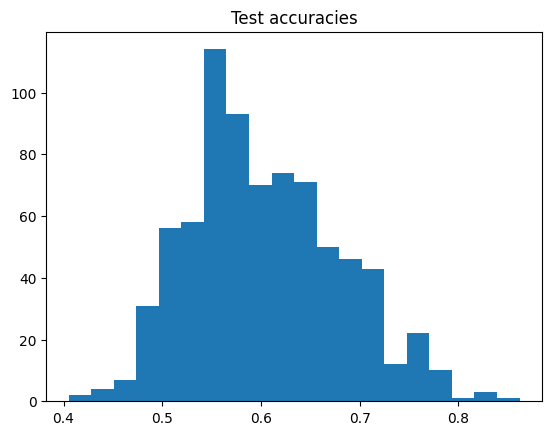

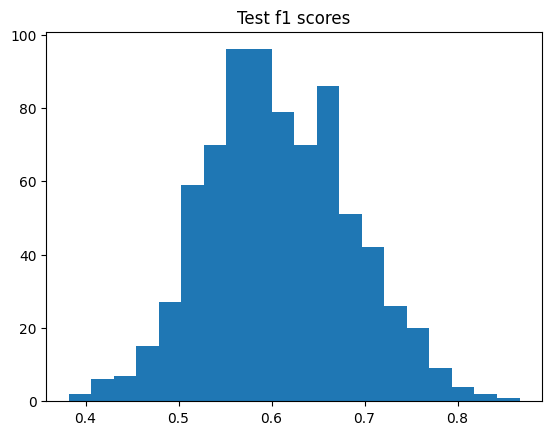

In [49]:
# plot histograms of the test accuracies and f1 scores
plt.hist(all_test_accs, bins=20)
plt.title('Test accuracies')
plt.show()

plt.hist(all_test_f1s, bins=20)
plt.title('Test f1 scores')
plt.show()

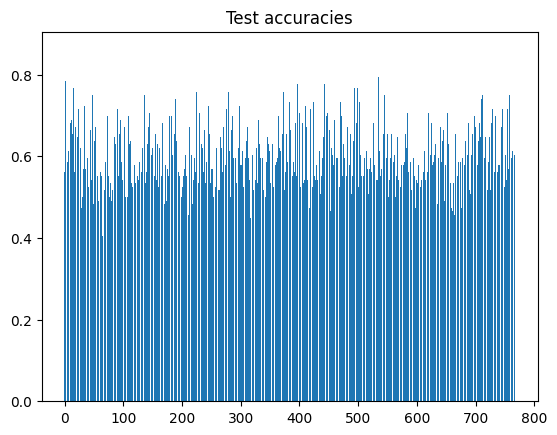

In [50]:
# plot bar chart of the accuracies across all 768 axes
plt.bar(range(768), all_test_accs)
plt.title('Test accuracies')
plt.show()

In [51]:
print(all_test_accs[:10]) 

[0.5603448275862069, 0.603448275862069, 0.7844827586206896, 0.49137931034482757, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.6120689655172413, 0.6810344827586207, 0.6379310344827587]


In [52]:
# convert list of tensors into list of floats
all_test_accs_val = [acc.item() for acc in all_test_accs]
all_test_f1s_val = [f1.item() for f1 in all_test_f1s]

print(all_test_accs_val[:10])
print(all_test_f1s_val[:10])

[0.5603448275862069, 0.603448275862069, 0.7844827586206896, 0.49137931034482757, 0.5862068965517241, 0.5862068965517241, 0.5862068965517241, 0.6120689655172413, 0.6810344827586207, 0.6379310344827587]
[0.5405405405405406, 0.5964912280701754, 0.7826086956521741, 0.512396694214876, 0.5555555555555556, 0.5636363636363636, 0.5636363636363636, 0.5945945945945946, 0.6725663716814159, 0.6379310344827587]


In [53]:
# convert the lists into numpy arrays
all_test_accs_val = np.array(all_test_accs_val)
all_test_f1s_val = np.array(all_test_f1s_val)
all_combined_losses = np.array(all_combined_losses)

## Identify top 10 axes by accuracy

In [54]:
# find the indices of the top 10 slices
top_10_indices = np.argsort(all_test_accs_val)[-10:]
top_10_indices_f1 = np.argsort(all_test_f1s_val)[-10:]
print("Top 10 indices by accuracy", top_10_indices)
print("Top 10 indices by f1 score", top_10_indices_f1)

# find the metrics of the top 10 axes based on ACCURACY index 
print("Accuracy for top 10 (accuracy)", all_test_accs_val[top_10_indices])
print("F1 Scores for top 10 (accuracy)", all_test_f1s_val[top_10_indices])
print("Losses for top 10 (accuracy)", all_combined_losses[top_10_indices])

Top 10 indices by accuracy [251 650 535 760 147 399 549 321 527 215]
Top 10 indices by f1 score [222 443 251 760 147 399 321 527 549 215]
Accuracy for top 10 (accuracy) [0.78448276 0.78448276 0.79310345 0.79310345 0.79310345 0.80172414
 0.81896552 0.81896552 0.82758621 0.86206897]
F1 Scores for top 10 (accuracy) [0.79338843 0.77876106 0.78947368 0.79661017 0.8        0.80672269
 0.83464567 0.8173913  0.83050847 0.86666667]
Losses for top 10 (accuracy) [15.66067147 14.83656079 13.19750416 14.82719624 14.99835408 17.01602566
 12.67100313 11.81238964 13.11246538 12.69520116]


In [55]:
# create a dataframe with accuracy and loss across all 768 axes
df_acc_loss = pd.DataFrame({
    'accuracy': all_test_accs_val,
    'f1': all_test_f1s,
    'loss': all_combined_losses
})

print(df_acc_loss[:10])

# save the dataframe to a csv file
df_acc_loss.to_csv(f"llm-outputs/{classification}_{timestamp}_xl_bruteforce_acc_loss.csv", index=False)

   accuracy        f1       loss
0  0.560345  0.540541  20.077402
1  0.603448  0.596491  19.847788
2  0.784483  0.782609  14.583324
3  0.491379  0.512397  20.063267
4  0.586207  0.555556  19.533502
5  0.586207  0.563636  19.774970
6  0.586207  0.563636  20.067390
7  0.612069  0.594595  19.558315
8  0.681034  0.672566  18.382016
9  0.637931  0.637931  16.980238


## Analysis for top 10 axes

In [56]:
# for each of the top 10 slices,
# average the embeddings of the pro words and the non words
# WHY: to see if there is a larger difference for axes that are more predictive

pro_emb_avg = []
non_emb_avg = []

for i in top_10_indices:
    df_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(i)],
        'label': df_train['label']
    })

    df_slice_pro = df_slice[df_slice['label'] == 1]
    df_slice_non = df_slice[df_slice['label'] == 0]

    pro_emb_avg.append(np.mean(df_slice_pro['embedding']))
    non_emb_avg.append(np.mean(df_slice_non['embedding']))

# create a dataframe with the average embeddings
df_top10_avg = pd.DataFrame({
    'index': top_10_indices,
    'pro': pro_emb_avg,
    'non': non_emb_avg,
    'diff': abs(np.array(pro_emb_avg) - np.array(non_emb_avg)),
    'acc': all_test_accs_val[top_10_indices],
    'f1': all_test_f1s_val[top_10_indices],
    'loss': all_combined_losses[top_10_indices]
})

print(df_top10_avg)

# save the dataframe to a csv file
df_top10_avg.to_csv(f"llm-outputs/{classification}_{timestamp}_xl_bruteforce_top10_metrics.csv", index=False)

   index       pro       non      diff       acc        f1       loss
0    251 -0.074584 -0.481271  0.406687  0.784483  0.793388  15.660671
1    650 -0.145249  0.332626  0.477874  0.784483  0.778761  14.836561
2    535 -0.116174 -0.499746  0.383572  0.793103  0.789474  13.197504
3    760 -0.011544  0.320215  0.331759  0.793103  0.796610  14.827196
4    147  0.012814 -0.251714  0.264528  0.793103  0.800000  14.998354
5    399 -0.109510  0.142347  0.251856  0.801724  0.806723  17.016026
6    549  0.042295 -0.392570  0.434865  0.818966  0.834646  12.671003
7    321  0.007378  0.362863  0.355485  0.818966  0.817391  11.812390
8    527  0.106269 -0.263056  0.369326  0.827586  0.830508  13.112465
9    215  0.085943 -0.213757  0.299700  0.862069  0.866667  12.695201


In [57]:
# Plot the histogram of the embedding values for the top 10 axes
# WHY: to see the relationship between the distribution of the positive and negative classes

def plot_axis_hist(slice):
    df_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(slice)],
        'label': df_train['label']
    })

    df_slice_pro = df_slice[df_slice['label'] == 1]
    df_slice_non = df_slice[df_slice['label'] == 0]

    # draw a histogram of the embeddings, with the pro words in red and the non-pro words in blue
    plt.hist(df_slice_pro['embedding'], bins=30, color='red', alpha=0.5)
    plt.hist(df_slice_non['embedding'], bins=30, color='blue', alpha=0.5)
    plt.title(f"Axis {slice} histogram")
    plt.show()

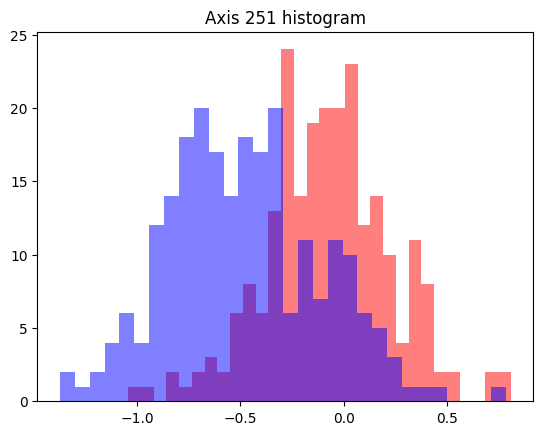

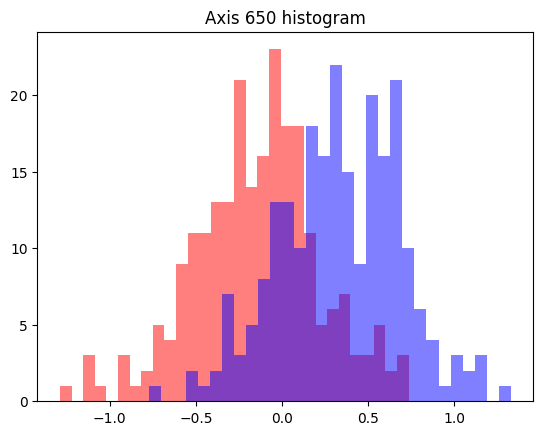

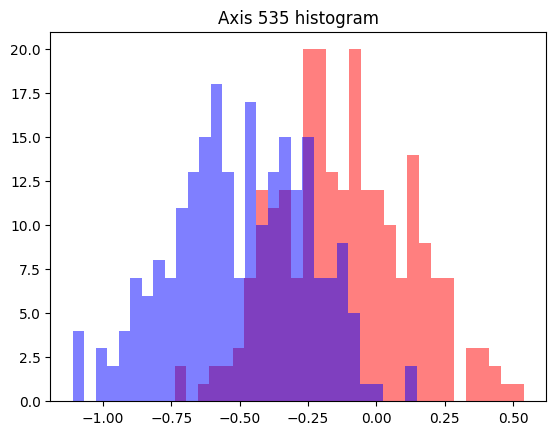

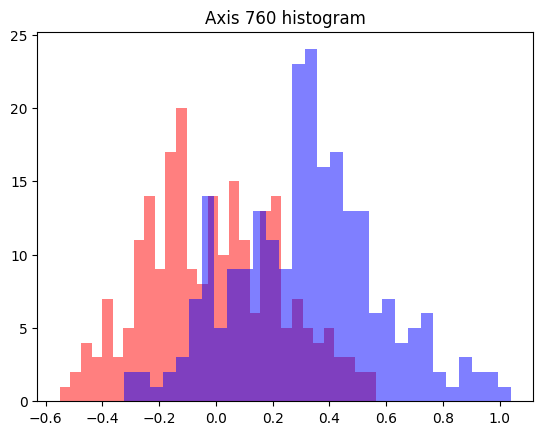

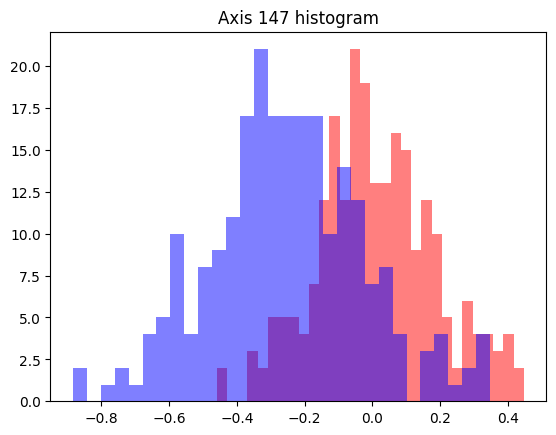

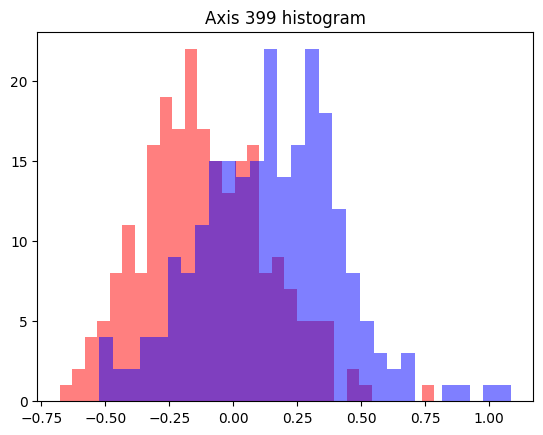

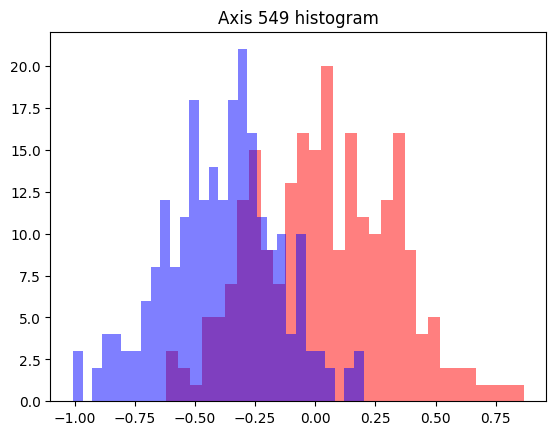

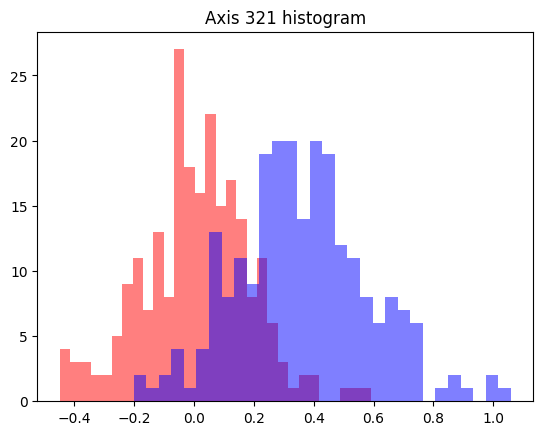

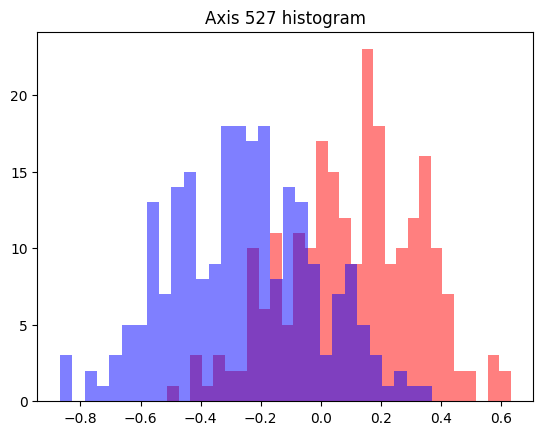

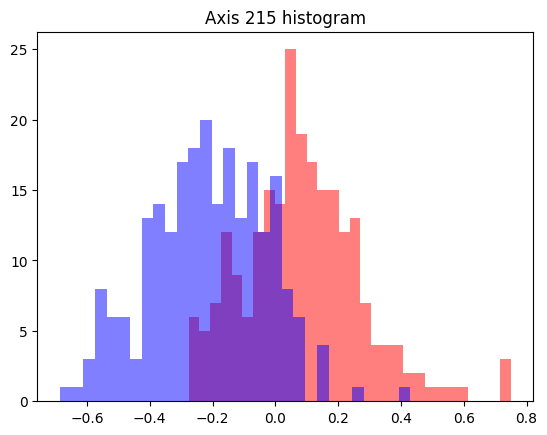

In [58]:
for i in top_10_indices:
    plot_axis_hist(i)

## Evaluate axes at 3 different scales (1s, 10s, 100s)

In [59]:
def run_model_on_defined_subslice(subslice, top_or_complement):
    if top_or_complement:
        subslice_indices = np.argsort(all_test_accs_val)[-subslice:]
        desc = "top"
    else:
        subslice_indices = np.argsort(all_test_accs_val)[:-subslice]
        subslice = 768 - subslice
        desc = "complement"

    df_subslice_train = pd.DataFrame(df_train[str(i)] for i in subslice_indices)
    df_subslice_train = df_subslice_train.T

    # combine all column values into list stored in one column
    df_subslice_train['embedding'] = df_subslice_train.values.tolist()

    # remove all columns except the list of embeddings
    df_subslice_train = df_subslice_train[['embedding']]
    df_subslice_train['label'] = df_train['label']
    df_subslice_train['word'] = df_train['word']

    print(df_subslice_train[:10])
    print(len(df_subslice_train['embedding'][0]))

    df_subslice_test = pd.DataFrame(df_test[str(i)] for i in subslice_indices)
    df_subslice_test = df_subslice_test.T

    # combine all column values into list stored in one column
    df_subslice_test['embedding'] = df_subslice_test.values.tolist()

    # remove all columns except the list of embeddings
    df_subslice_test = df_subslice_test[['embedding']]
    df_subslice_test['label'] = df_test['label']
    df_subslice_test['word'] = df_test['word']

    print(df_subslice_test[:10])
    print(len(df_subslice_test['embedding'][0]))

    subslice_train_loader, subslice_test_loader = create_dataloaders(df_subslice_train, df_subslice_test)

    # take the best of 3 runs
    subslice_best_test_acc = 0
    subslice_best_test_f1 = 0

    for i in range(num_loop):
        net, subslice_best_combined_loss = train_model(subslice_train_loader, subslice)

        # train_acc, train_f1 = evaluate_net(subslice_train_loader, net)
        test_acc, test_f1 = evaluate_net(subslice_test_loader, net)

        if test_acc > subslice_best_test_acc and test_f1 > subslice_best_test_f1:
            subslice_best_test_acc = test_acc
            subslice_best_test_f1 = test_f1

    print(f'{desc} {subslice} axes best combined loss: {subslice_best_combined_loss}')
    print(f'{desc} {subslice} axes best test f1: {subslice_best_test_f1:.4f}')
    print(f'{desc} {subslice} axes best test accuracy: {subslice_best_test_acc*100:.2f}% \n')

    return subslice_best_test_acc, subslice_best_test_f1, subslice_best_combined_loss


In [60]:
# run for full 768 axes
full_acc, full_f1, full_loss = run_model_on_defined_subslice(768, True)

                                           embedding  label               word
0  [0.7773082852363586, -0.32649996876716614, -0....      1       grey brocket
1  [0.7032944560050964, -0.1845192164182663, -0.3...      1         kingfisher
2  [0.43497908115386963, 0.08883436024188995, 0.1...      1      japanese deer
3  [0.46805712580680847, -0.5945833325386047, 0.2...      1           platypus
4  [0.8701428174972534, -0.17326444387435913, -0....      1  small red brocket
5  [-0.12060880661010742, -0.4921635389328003, 0....      1            buffalo
6  [0.7035617828369141, -0.20979271829128265, -0....      1            seagull
7  [0.24625860154628754, -0.03433587774634361, 0....      1          sei whale
8  [0.13895389437675476, -0.15952938795089722, 0....      1              rhino
9  [0.3017931580543518, -0.15289954841136932, 0.2...      1            kouprey
768
                                           embedding  label  \
0  [0.2718401551246643, 0.06408467888832092, 0.14...      1   
1

In [71]:
# save the metrics to a csv file
df_full = pd.DataFrame({
    'acc': [full_acc],
    'f1': [full_f1],
    'loss': [full_loss]
})

df_full.to_csv(f"llm-outputs/{classification}_{timestamp}_xl_bruteforce_768_metrics.csv", index=False)

In [66]:
def run_defined_subslice_for_scale(scale):
    subslice_top_accs = []
    subslice_top_f1s = []
    subslice_top_losses = []

    subslice_complement_accs = []
    subslice_complement_f1s = []
    subslice_complement_losses = []

    if scale < 100:
        range_val = 10
    else:
        range_val = 4

    for i in range(range_val):
        acc, f1, loss = run_model_on_defined_subslice((i+1)*scale, True)
        subslice_top_accs.append(acc)
        subslice_top_f1s.append(f1)
        subslice_top_losses.append(loss)

    for i in range(range_val):
        acc, f1, loss = run_model_on_defined_subslice((i+1)*scale, False)
        subslice_complement_accs.append(acc)
        subslice_complement_f1s.append(f1)
        subslice_complement_losses.append(loss)

    # if scale >= 100:
    #     acc, f1, loss = run_model_on_defined_subslice(768, True)
    #     subslice_top_accs.append(acc)
    #     subslice_top_f1s.append(f1)
    #     subslice_top_losses.append(loss)

    #     subslice_complement_accs.append(0)
    #     subslice_complement_f1s.append(0)
    #     subslice_complement_losses.append(0)

    subslice_top_vals = [((i+1)*scale) for i in range(range_val)]

    # plot the top and complement accuracies for subslice as two lines on the same plot
    # shift the x axis by 1 to account for the fact that the first subslice is 1
    # plot the 768 accuracy as a dotted line as baseline
    plt.plot(subslice_top_vals, subslice_top_accs, label='top')
    plt.plot(subslice_top_vals, subslice_complement_accs, label='complement')   
    plt.plot([subslice_top_vals[0], subslice_top_vals[-1]], [full_acc, full_acc], ':', label='full')
    plt.title(f'Top and complement accuracies for scale {scale}')
    plt.xlabel('Number of axes')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # create df for subslice top and complement metrics
    df_subslice = pd.DataFrame({
        'subslice': subslice_top_vals,
        'acc_top': subslice_top_accs,
        'acc_complement': subslice_complement_accs,
        'f1_top': subslice_top_f1s,
        'f1_complement': subslice_complement_f1s,
        'loss_top': subslice_top_losses,
        'loss_complement': subslice_complement_losses
    })

    # save the dataframe to a csv file
    df_subslice.to_csv(f"llm-outputs/{classification}_{timestamp}_xl_bruteforce_s{scale}_top_metrics.csv", index=False)

    return subslice_top_accs, subslice_top_f1s, subslice_top_losses, subslice_complement_accs, subslice_complement_f1s, subslice_complement_losses

                embedding  label               word
0  [0.030409693717956543]      1       grey brocket
1   [0.10447609424591064]      1         kingfisher
2    [0.2529166042804718]      1      japanese deer
3   [0.34570133686065674]      1           platypus
4  [0.025094512850046158]      1  small red brocket
5   [-0.1292358636856079]      1            buffalo
6  [-0.16795456409454346]      1            seagull
7  [0.052518319338560104]      1          sei whale
8    [0.0618450827896595]      1              rhino
9   [0.05363233759999275]      1            kouprey
1
                embedding  label                  word
0   [0.03831162303686142]      1             orangutan
1   [0.14214731752872467]      1                puffin
2    [0.3347271978855133]      1  dulzura kangaroo rat
3    [0.2589550316333771]      1              steenbok
4   [0.02954407036304474]      1                 serow
5   [0.15654641389846802]      1           white rhino
6    [1.0188186168670654]      1         

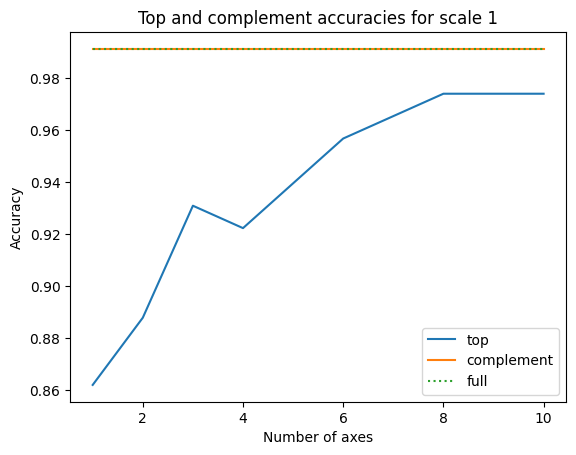

In [67]:
# run for scale = 1
s1_top_accs, s1_top_f1s, s1_top_losses, s1_complement_accs, s1_complement_f1s, s1_complement_losses = run_defined_subslice_for_scale(1)

                                           embedding  label               word
0  [0.017333514988422394, -0.027508893981575966, ...      1       grey brocket
1  [-0.27788177132606506, 0.5752103328704834, -0....      1         kingfisher
2  [0.011668860912322998, -0.2996470630168915, 0....      1      japanese deer
3  [0.3190344572067261, 0.5414693355560303, -0.12...      1           platypus
4  [-0.02718067169189453, 0.1905754953622818, 0.2...      1  small red brocket
5  [-0.19210372865200043, -0.6337803602218628, -0...      1            buffalo
6  [0.000517169653903693, 0.7349116802215576, 0.0...      1            seagull
7  [0.028899788856506348, 0.10619000345468521, -0...      1          sei whale
8  [0.2894073724746704, -0.5821957588195801, -0.3...      1              rhino
9  [0.17280732095241547, -0.08458811789751053, -0...      1            kouprey
10
                                           embedding  label  \
0  [-0.04974577575922012, -0.3490111529827118, 0....      1   
1 

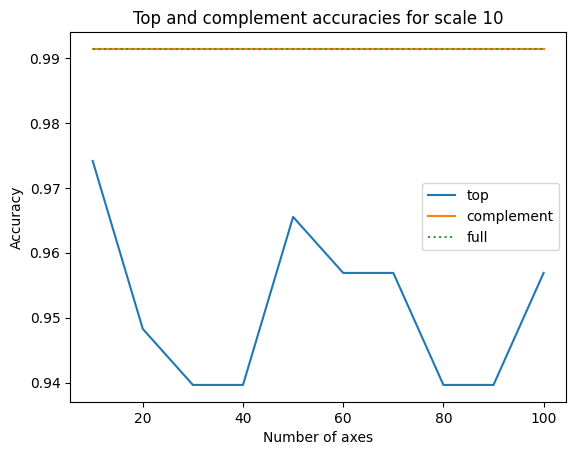

In [68]:
# run for scale = 10
s10_top_accs, s10_top_f1s, s10_top_losses, s10_complement_accs, s10_complement_f1s, s10_complement_losses = run_defined_subslice_for_scale(10)

                                           embedding  label               word
0  [-0.06894882768392563, 0.39916154742240906, -0...      1       grey brocket
1  [0.1694364994764328, 0.3274713456630707, -0.31...      1         kingfisher
2  [0.1433544158935547, -0.12812739610671997, -0....      1      japanese deer
3  [0.0020309612154960632, 0.503332257270813, 0.1...      1           platypus
4  [0.058278050273656845, 0.16332948207855225, -0...      1  small red brocket
5  [-0.6970308423042297, -0.7565367221832275, 0.1...      1            buffalo
6  [-0.03257828578352928, 0.4065607488155365, -0....      1            seagull
7  [-0.04709220305085182, 0.05060749128460884, -0...      1          sei whale
8  [-0.2190331369638443, -0.5766761302947998, 0.2...      1              rhino
9  [-0.17821095883846283, 0.03935050964355469, -0...      1            kouprey
100
                                           embedding  label  \
0  [0.13896046578884125, 0.30504295229911804, -0....      1   
1

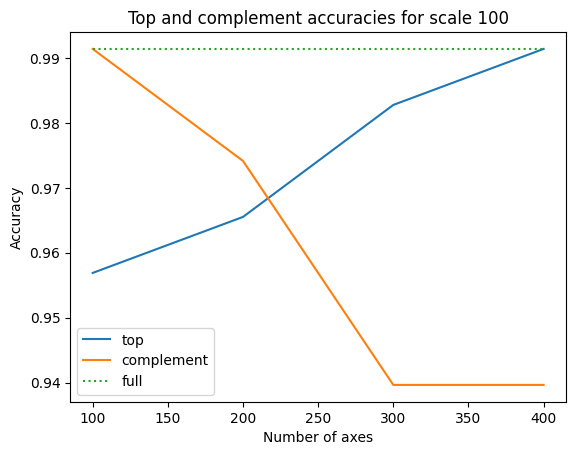

In [69]:
# run for scale = 100
s100_top_accs, s100_top_f1s, s100_top_losses, s100_complement_accs, s100_complement_f1s, s100_complement_losses = run_defined_subslice_for_scale(100)

In [70]:
# full_train_pos_prob = output_pos_prob(full_train_loader, full_best_net)
# full_test_pos_prob = output_pos_prob(full_test_loader, full_best_net)

# # create a dataframe with the words and their positive probabilities
# df_full_train_pos_prob = pd.DataFrame({
#     'word': df_full_train['word'],
#     'pos_prob': full_train_pos_prob,
#     'label': df_full_train['label']
# })

# df_full_test_pos_prob = pd.DataFrame({
#     'word': df_full_test['word'],
#     'pos_prob': full_test_pos_prob,
#     'label': df_full_test['label']
# })

# # combine the train and test dataframes
# df_full_pos_prob = pd.concat([df_full_train_pos_prob, df_full_test_pos_prob])

# print(df_full_pos_prob[:10])

# # save the dataframe to a csv file
# df_full_pos_prob.to_csv(f"llm-outputs/{classification}_{timestamp}_xl_bruteforce_full_pos_prob.csv", index=False)